# Machine Learning using Python 
# Exam – Paper 2

# Part II: Deep Learning

## Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler  
import nltk
import math
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords 
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
sentimental_df=pd.read_csv("Sentiment.csv")

In [3]:
sentimental_df

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


## Understanding the data

In [4]:
sentimental_df.shape

(13871, 21)

In [5]:
sentimental_df.dtypes

id                             int64
candidate                     object
candidate_confidence         float64
relevant_yn                   object
relevant_yn_confidence       float64
sentiment                     object
sentiment_confidence         float64
subject_matter                object
subject_matter_confidence    float64
candidate_gold                object
name                          object
relevant_yn_gold              object
retweet_count                  int64
sentiment_gold                object
subject_matter_gold           object
text                          object
tweet_coord                   object
tweet_created                 object
tweet_id                       int64
tweet_location                object
user_timezone                 object
dtype: object

In [6]:
sentimental_df.select_dtypes("object")

,candidate,relevant_yn,sentiment,subject_matter,candidate_gold,name,relevant_yn_gold,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,No candidate mentioned,yes,Neutral,None of the above,NaN,I_Am_Kenzi,NaN,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,NaN,Quito
1,Scott Walker,yes,Positive,None of the above,NaN,PeacefulQuest,NaN,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,NaN,NaN
2,No candidate mentioned,yes,Neutral,None of the above,NaN,PussssyCroook,NaN,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,NaN,NaN
3,No candidate mentioned,yes,Positive,None of the above,NaN,MattFromTexas31,NaN,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,Texas,Central Time (US & Canada)
4,Donald Trump,yes,Positive,None of the above,NaN,sharonDay5,NaN,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,No candidate mentioned,yes,Negative,Abortion,No candidate mentioned,SantoliDonato,yes,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,Como,NaN
13867,Mike Huckabee,yes,Positive,None of the above,Mike Huckabee,mhfa16hq,yes,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,USA,NaN
13868,Ted Cruz,yes,Positive,None of the above,Ted Cruz,DrottM,yes,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,NaN,NaN
13869,Donald Trump,yes,Negative,Women's Issues (not abortion though),Donald Trump,danijeantheq,yes,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,NaN,NaN


In [7]:
sentimental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [8]:
sentimental_df.describe()

,id,candidate_confidence,relevant_yn_confidence,sentiment_confidence,subject_matter_confidence,retweet_count,tweet_id
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,1.387100e+04
mean,6936.000000,0.855689,0.927304,0.756936,0.782801,45.803331,6.296058e+17
std,4004.357127,0.241388,0.141696,0.217682,0.258215,153.981724,9.611863e+13
min,1.000000,0.222200,0.333300,0.186000,0.222200,0.000000,6.294531e+17
25%,3468.500000,0.674200,1.000000,0.651700,0.641300,0.000000,6.294861e+17
50%,6936.000000,1.000000,1.000000,0.681300,1.000000,2.000000,6.296726e+17
75%,10403.500000,1.000000,1.000000,1.000000,1.000000,44.000000,6.296882e+17
max,13871.000000,1.000000,1.000000,1.000000,1.000000,4965.000000,6.297017e+17


In [9]:
sentimental_df.head(5)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [10]:
sentimental_df.tail(5)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN
13870,13871,Ted Cruz,0.9242,yes,0.9614,Positive,0.9614,None of the above,0.9242,Ted Cruz,...,yes,65,Positive,NaN,RT @Lrihendry: #TedCruz headed into the Presid...,NaN,2015-08-06 18:22:27 -0700,629462573641920512,"San Antonio, TX",Central Time (US & Canada)


## Checking For Null Values

In [11]:
sentimental_df.isnull().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [12]:
per_null_train = sentimental_df.isnull().sum().sort_values(0, ascending = False)/(sentimental_df.shape[0])*100
print(per_null_train.head())

sentiment_gold         99.891861
subject_matter_gold    99.870233
tweet_coord            99.848605
candidate_gold         99.798140
relevant_yn_gold       99.769303
dtype: float64


C:\Users\JOE\AppData\Local\Temp/ipykernel_560/3949387320.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  per_null_train = sentimental_df.isnull().sum().sort_values(0, ascending = False)/(sentimental_df.shape[0])*100


In [13]:
per_null_train

sentiment_gold               99.891861
subject_matter_gold          99.870233
tweet_coord                  99.848605
candidate_gold               99.798140
relevant_yn_gold             99.769303
user_timezone                31.742484
tweet_location               28.202725
subject_matter                2.350227
candidate                     0.692091
tweet_id                      0.000000
tweet_created                 0.000000
text                          0.000000
id                            0.000000
retweet_count                 0.000000
subject_matter_confidence     0.000000
sentiment_confidence          0.000000
sentiment                     0.000000
relevant_yn_confidence        0.000000
relevant_yn                   0.000000
candidate_confidence          0.000000
name                          0.000000
dtype: float64

<AxesSubplot:>

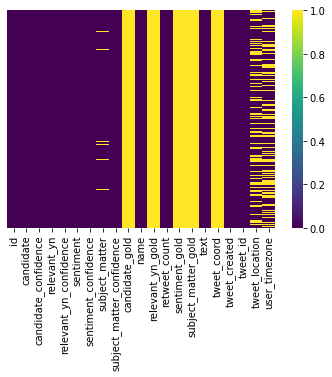

In [14]:
sns.heatmap(sentimental_df
            
            .isnull(),yticklabels=False,cmap="viridis")

### Dropping the Columns having Null values more than 99% 

In [15]:
df1=sentimental_df.copy()

In [16]:
df1

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [17]:
sentimental_df.drop(["sentiment_gold","subject_matter_gold","tweet_coord","candidate_gold","relevant_yn_gold","user_timezone"],axis=1,inplace=True)

## Checking for the Mixed Values

In [18]:
sentimental_df['tweet_location'].unique() #returns a list of unique values

array([nan, 'Texas', 'North Georgia', ..., 'FXBG',
       'Still figuring it out', 'Baltimore, MD & Washington, DC'],
      dtype=object)

In [19]:
sentimental_df['subject_matter'].unique() #returns a list of unique values

array(['None of the above', 'FOX News or Moderators', 'Foreign Policy',
       "Women's Issues (not abortion though)", 'LGBT issues', 'Abortion',
       nan, 'Racial issues', 'Jobs and Economy', 'Religion',
       'Healthcare (including Medicare)', 'Immigration', 'Gun Control'],
      dtype=object)

In [20]:
sentimental_df['candidate'].unique() #returns a list of unique values

array(['No candidate mentioned', 'Scott Walker', 'Donald Trump',
       'Ted Cruz', 'Ben Carson', 'Mike Huckabee', 'Jeb Bush',
       'Chris Christie', 'Marco Rubio', nan, 'Rand Paul', 'John Kasich'],
      dtype=object)

### Replacing the categorical columns

In [21]:
sentimental_df["tweet_location"].mode()

0    USA
dtype: object

In [22]:
sentimental_df['tweet_location']=sentimental_df['tweet_location'].fillna('USA')

In [23]:
sentimental_df["subject_matter"].mode()

0    None of the above
dtype: object

In [24]:
sentimental_df['subject_matter']=sentimental_df['subject_matter'].fillna('None of the above')

In [25]:
sentimental_df["candidate"].mode()

0    No candidate mentioned
dtype: object

In [26]:
sentimental_df['candidate']=sentimental_df['candidate'].fillna('No candidate mentioned')

In [27]:
sentimental_df.isnull().sum()

id                           0
candidate                    0
candidate_confidence         0
relevant_yn                  0
relevant_yn_confidence       0
sentiment                    0
sentiment_confidence         0
subject_matter               0
subject_matter_confidence    0
name                         0
retweet_count                0
text                         0
tweet_created                0
tweet_id                     0
tweet_location               0
dtype: int64

### 1) Print the total number of positive and negative sentiments.
### 2) Build a sequential LSTM model to predict positive and negative sentiments.
### 3) Based on the model, check the sentiment for the following two sentences
a. 'He is a great leader.'
b. 'He is a terrible leader.'

###  Analysing the Dataset

In [28]:
review_df = sentimental_df[['text','sentiment']]
print(review_df.shape)
review_df.head(5)

(13871, 2)


,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [29]:
review_df = sentimental_df[sentimental_df['sentiment'] !='Neutral']
print(review_df.shape)
review_df.head(5)

(10729, 15)


,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,name,retweet_count,text,tweet_created,tweet_id,tweet_location
1,2,Scott Walker,1.0000,yes,1.0,Positive,0.6333,None of the above,1.0000,PeacefulQuest,26,RT @ScottWalker: Didn't catch the full #GOPdeb...,2015-08-07 09:54:46 -0700,629697199560069120,USA
3,4,No candidate mentioned,1.0000,yes,1.0,Positive,1.0000,None of the above,0.7039,MattFromTexas31,138,RT @RobGeorge: That Carly Fiorina is trending ...,2015-08-07 09:54:45 -0700,629697197118861312,Texas
4,5,Donald Trump,1.0000,yes,1.0,Positive,0.7045,None of the above,1.0000,sharonDay5,156,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,2015-08-07 09:54:45 -0700,629697196967903232,USA
5,6,Ted Cruz,0.6332,yes,1.0,Positive,0.6332,None of the above,1.0000,DRJohnson11,228,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",2015-08-07 09:54:44 -0700,629697194283499520,USA
6,7,No candidate mentioned,1.0000,yes,1.0,Negative,0.6761,FOX News or Moderators,1.0000,DebWilliams57,17,RT @warriorwoman91: I liked her and was happy ...,2015-08-07 09:54:44 -0700,629697192383672320,North Georgia


In [30]:
sentimental_df.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'name', 'retweet_count',
       'text', 'tweet_created', 'tweet_id', 'tweet_location'],
      dtype='object')

In [31]:
sentimental_df = sentimental_df[sentimental_df["sentiment"] != "Neutral"]

## TEXT PRE-PROCESSING

In [32]:
df_new = sentimental_df[["sentiment", "text"]]
df_new.head()

,sentiment,text
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,Positive,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,Negative,RT @warriorwoman91: I liked her and was happy ...


In [33]:
def remove_tags(string):
    removelist = ""
    result = re.sub('RT','',string) # Remove RT from text         
    result = result.lower()
    return result
df_new['text'] = df_new['text'].apply(lambda cw : remove_tags(cw))

C:\Users\JOE\AppData\Local\Temp/ipykernel_560/4152807636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['text'] = df_new['text'].apply(lambda cw : remove_tags(cw))


In [34]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
df_new['text'] = df_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

C:\Users\JOE\AppData\Local\Temp/ipykernel_560/1524829681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['text'] = df_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [35]:
# Lemmatizing text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df_new['text'] = df_new.text.apply(lemmatize_text)
df_new.sample(15)

C:\Users\JOE\AppData\Local\Temp/ipykernel_560/4218381602.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['text'] = df_new.text.apply(lemmatize_text)


,sentiment,text
2023,Negative,@johnfugelsang: gop candidate discussing illeg...
12059,Negative,"@monaeltahawy: oh boy: ""social issues"" = gop c..."
1410,Negative,#gopdebate last night ridiculously biased @rea...
11135,Positive,@lukewearechange: evidence hack talk come syri...
9440,Negative,@rwsurfergirl: need order another green apple ...
7779,Positive,listening @cnn recap #gopdebate day work..... ...
4552,Negative,".@randpaul, trying please everybody, succeeds ..."
7490,Negative,"kijivu, gorilla prague zoo, reacts primate agg..."
12505,Negative,ignore fact ally negotiated iran deal us. bomb...
5168,Negative,@megynkelly horrible commentator @foxnews terr...


In [36]:
# Encoding Labels
reviews = df_new["text"].values
labels = df_new["sentiment"].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [37]:
# Train Test Split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [38]:
total_count=review_df["sentiment"].value_counts()

In [39]:
p_count = 0
n_count = 0
for i in sentimental_df["sentiment"]:
    if i == "Positive":
        p_count += 1
    elif i == "Negative":
        n_count += 1
print("Positive count : ", p_count)
print("Negative count : ", n_count)
print("Total positive and negative count : ", p_count + n_count)

Positive count :  2236
Negative count :  8493
Total positive and negative count :  10729


In [40]:
sentiment_label = review_df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 Index(['Positive', 'Negative'], dtype='object'))

### Build the Text Classifier

In [41]:
# Tokenizing Sentences
vocab_size = 3000 
oov_tok = ''
embedding_dim = 100
max_length = 200 
padding_type='post'
trunc_type='post'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [42]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/5
227/227 [==============================] - 23s 93ms/step - loss: 0.4220 - accuracy: 0.8234 - val_loss: 0.3436 - val_accuracy: 0.8584
Epoch 2/5
227/227 [==============================] - 23s 100ms/step - loss: 0.2723 - accuracy: 0.8865 - val_loss: 0.3674 - val_accuracy: 0.8559
Epoch 3/5
227/227 [==============================] - 25s 110ms/step - loss: 0.2213 - accuracy: 0.9083 - val_loss: 0.4037 - val_accuracy: 0.8571
Epoch 4/5
227/227 [==============================] - 23s 100ms/step - loss: 0.1852 - accuracy: 0.9278 - val_loss: 0.3942 - val_accuracy: 0.8447
Epoch 5/5
227/227 [==============================] - 27s 121ms/step - loss: 0.1570 - accuracy: 0.9350 - val_loss: 0.4157 - val_accuracy: 0.8348


In [44]:
prediction = model.predict(test_padded)
pred_labels = []
for i in prediction:
    if i >= 0.66:
        pred_labels.append(1)
    elif  i < 0.66 and i >= 0.33:
        pred_labels.append(0)
    else:
        pred_labels.append(-1)

### Checking sentiments for the given sentences

In [45]:
sentence = ["He is a great leader.", 
            "He is a terrible leader."]

sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, padding='post', maxlen=max_length)
prediction = model.predict(padded)
pred_labels = []

for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
        
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

He is a great leader.
Predicted sentiment :  Positive
He is a terrible leader.
Predicted sentiment :  Negative
